<a href="https://colab.research.google.com/github/Bonam24/customer-purchase-prediction/blob/main/CustomerDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix



In [3]:
data = pd.read_csv("/content/online_shoppers_intention.csv")

In [4]:
data.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

# Summary statistics
display(data.describe())


Missing Values:
 Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157214   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

In [9]:
# Convert categorical variables to numeric
label_encoder = LabelEncoder()
data['Month'] = label_encoder.fit_transform(data['Month'])
data['VisitorType'] = label_encoder.fit_transform(data['VisitorType'])
data['Weekend'] = data['Weekend'].astype(int)
data['Revenue'] = data['Revenue'].astype(int)

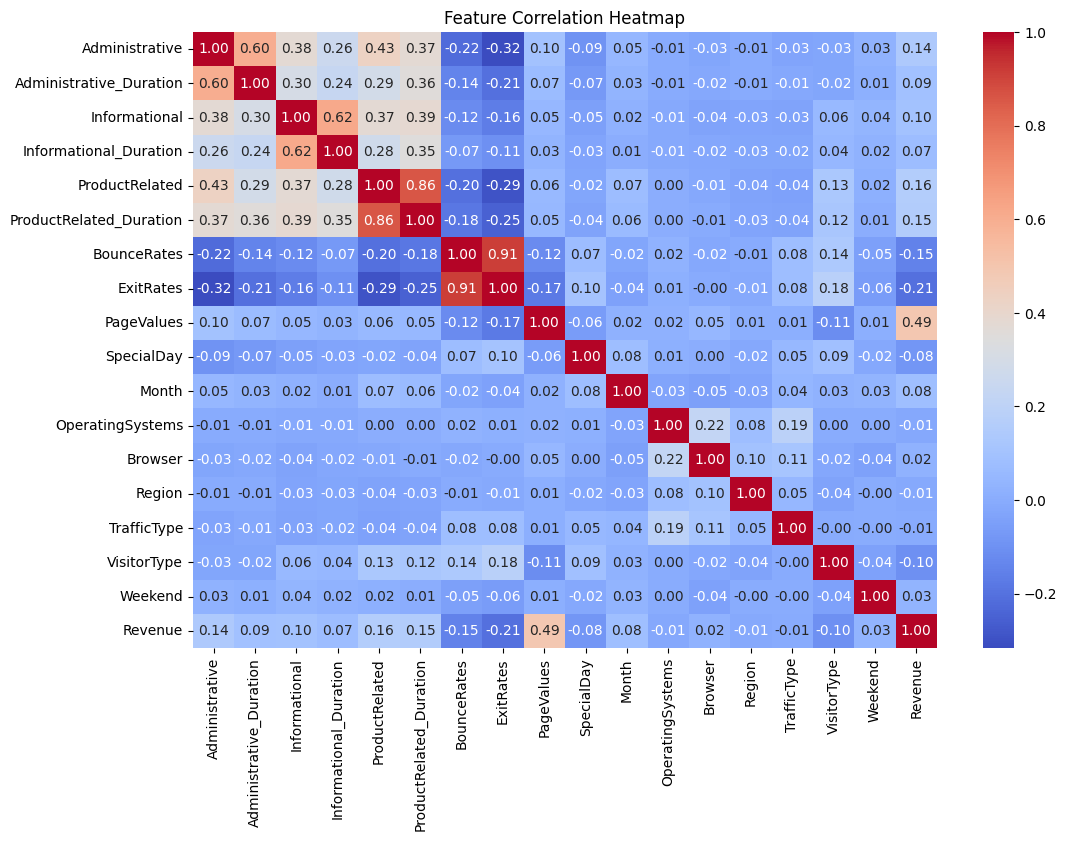

In [10]:
# Visualizing correlations
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

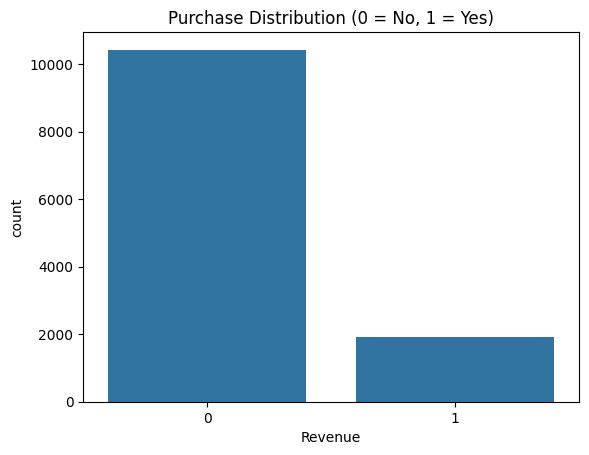

In [11]:
# Countplot for target variable
sns.countplot(x=data['Revenue'])
plt.title("Purchase Distribution (0 = No, 1 = Yes)")
plt.show()

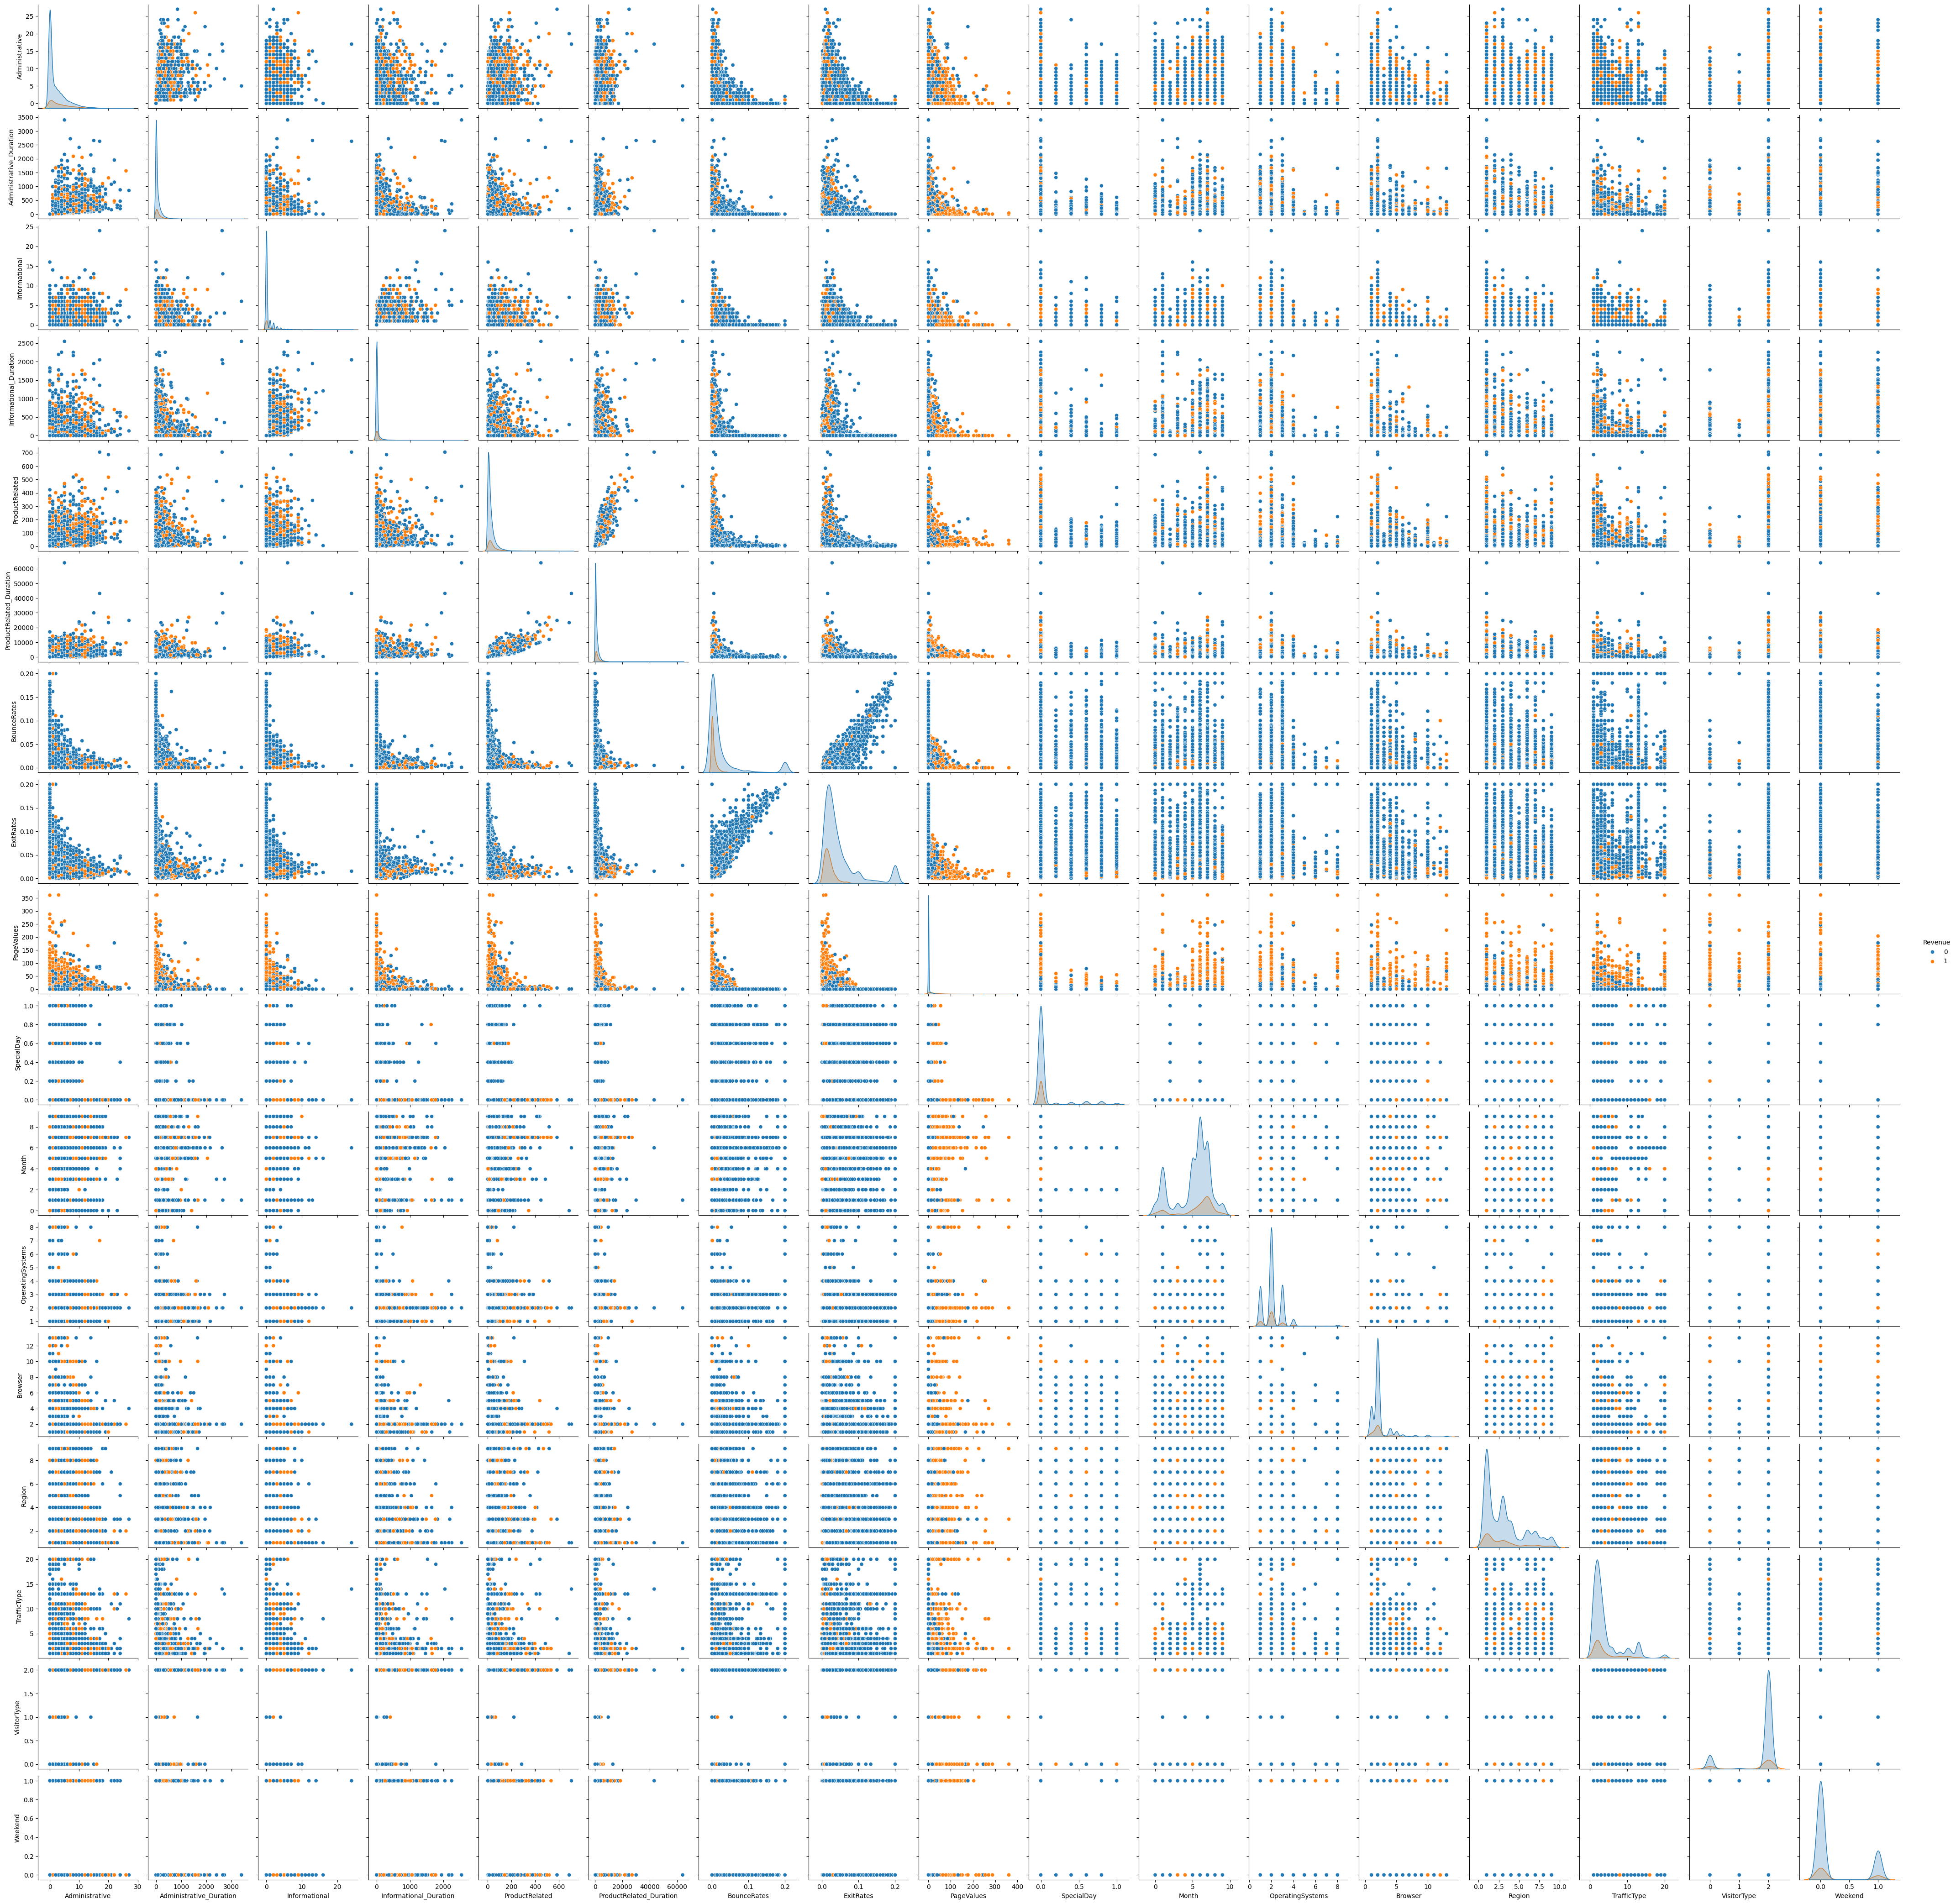

In [12]:
# Pairplot for numerical features
sns.pairplot(data, hue='Revenue', diag_kind='kde')
plt.show()

In [13]:
# Define Features and Target
features = [
    'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
    'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend'
]
target = 'Revenue'
X = data[features]
y = data[target]

In [14]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
# Train Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Load Dataset
# Evaluate Models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))



Model: Logistic Regression
Accuracy: 0.8690
Precision: 0.7268
Recall: 0.3431
F1 Score: 0.4661
ROC AUC: 0.6586
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.93      2055
           1       0.73      0.34      0.47       411

    accuracy                           0.87      2466
   macro avg       0.80      0.66      0.70      2466
weighted avg       0.86      0.87      0.85      2466


Model: Random Forest
Accuracy: 0.8909
Precision: 0.7383
Recall: 0.5353
F1 Score: 0.6206
ROC AUC: 0.7487
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      2055
           1       0.74      0.54      0.62       411

    accuracy                           0.89      2466
   macro avg       0.83      0.75      0.78      2466
weighted avg       0.88      0.89      0.88      2466



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:14:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.8938
Precision: 0.7321
Recall: 0.5718
F1 Score: 0.6421
ROC AUC: 0.7650
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      2055
           1       0.73      0.57      0.64       411

    accuracy                           0.89      2466
   macro avg       0.83      0.76      0.79      2466
weighted avg       0.89      0.89      0.89      2466




Model: Logistic Regression
Accuracy: 0.8690
Precision: 0.7268
Recall: 0.3431
F1 Score: 0.4661
ROC AUC: 0.6586
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.93      2055
           1       0.73      0.34      0.47       411

    accuracy                           0.87      2466
   macro avg       0.80      0.66      0.70      2466
weighted avg       0.86      0.87      0.85      2466



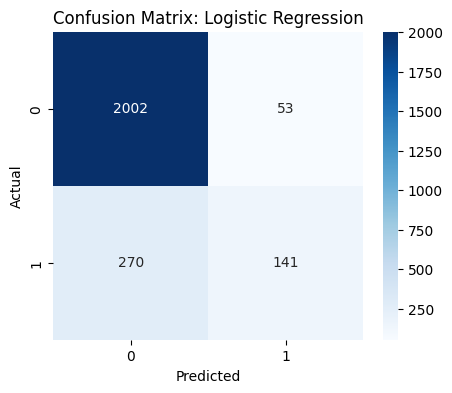


Model: Random Forest
Accuracy: 0.8946
Precision: 0.7492
Recall: 0.5523
F1 Score: 0.6359
ROC AUC: 0.7577
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      2055
           1       0.75      0.55      0.64       411

    accuracy                           0.89      2466
   macro avg       0.83      0.76      0.79      2466
weighted avg       0.89      0.89      0.89      2466



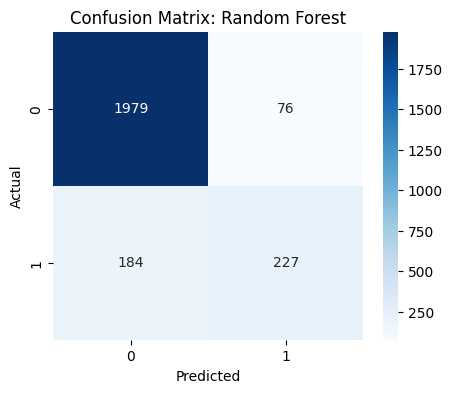

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:15:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Model: XGBoost
Accuracy: 0.8938
Precision: 0.7321
Recall: 0.5718
F1 Score: 0.6421
ROC AUC: 0.7650
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      2055
           1       0.73      0.57      0.64       411

    accuracy                           0.89      2466
   macro avg       0.83      0.76      0.79      2466
weighted avg       0.89      0.89      0.89      2466



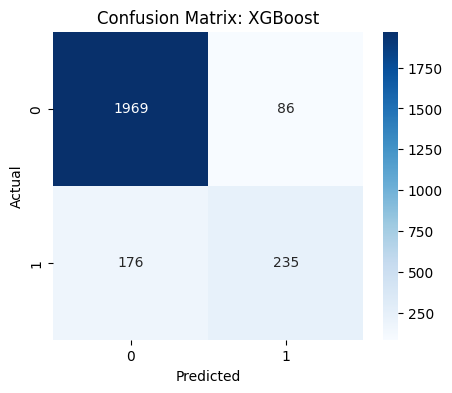

In [17]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_pred):.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

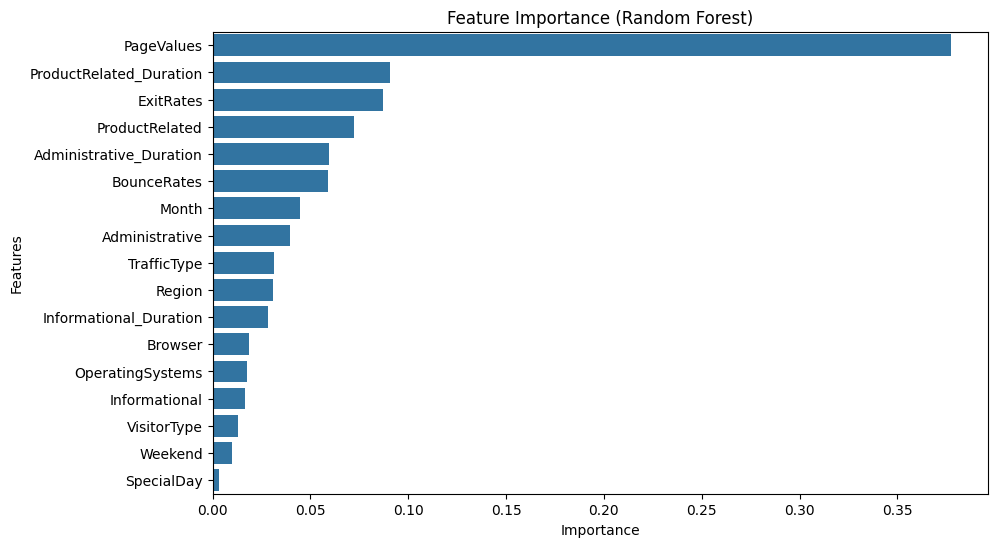

In [18]:
# Feature Importance (Random Forest)
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
feature_importance = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()